## Playing around

In [275]:
import numpy as np
import pandas as pd

%matplotlib inline

In [276]:
dat = pd.read_csv('../../data/pediatric_patient_drug_reports.csv',index_col=0)

In [277]:
dat.head()

,safetyreportid,age,atc_concept_id,atc_concept_name,meddra_concept_id,meddra_concept_name,reporter_qualification,drug_indication
1,10040842,8.0,21600005,sodium fluoride,36919098,Abnormal Behaviour,Other health professional,GONADAL DYSGENESIS
3,10040842,8.0,21600005,sodium fluoride,35607483,Vision Blurred,Other health professional,GONADAL DYSGENESIS
5,10298142,2.0,21600005,sodium fluoride,36211461,Drug Administration Error,Consumer or non-health professional,ASTHMA
7,10298142,2.0,21600005,sodium fluoride,36718555,Insomnia,Consumer or non-health professional,ASTHMA
8,10413313,14.0,21600005,sodium fluoride,35809327,Drug Ineffective,Other health professional,ASTHMA


## showing data characteristics and objects

In [278]:
type(dat)

pandas.core.frame.DataFrame

In [279]:
dat.age

1          8.0
3          8.0
5          2.0
7          2.0
8         14.0
          ... 
196165     8.0
196167     8.0
196169     8.0
196171     8.0
196172     6.0
Name: age, Length: 100000, dtype: float64

In [280]:
dat.atc_concept_id

1         21600005
3         21600005
5         21600005
7         21600005
8         21600005
            ...   
196165    21600096
196167    21600096
196169    21600096
196171    21600096
196172    21600096
Name: atc_concept_id, Length: 100000, dtype: int64

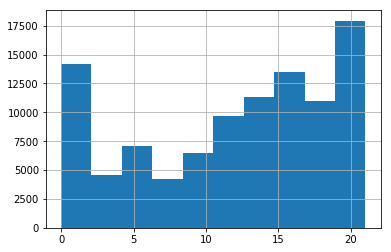

In [281]:
dat.age.hist()

## What are the top ten reported reactions?

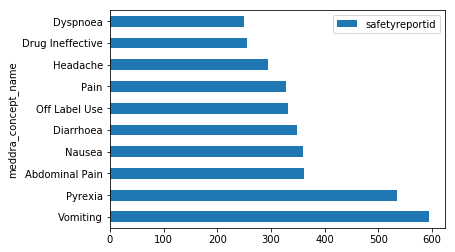

In [282]:
(dat.
 loc[:,['safetyreportid','meddra_concept_name']].
 drop_duplicates().
 groupby('meddra_concept_name').
 count().
 sort_values('safetyreportid',ascending=False).
 head(10).
 plot.barh()
)

## What are the top ten reported drugs?

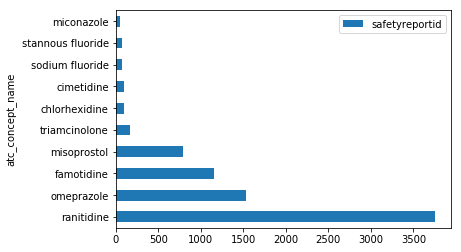

In [283]:
(dat.
loc[:,['atc_concept_name','safetyreportid']].
drop_duplicates().
groupby('atc_concept_name').
    count().
    sort_values('safetyreportid', ascending=False).
    head(10).
    plot.barh()
    )

## For all of the asthma patients, what were their age distribution?

In [284]:
# Humanized Algoirthm
# Locate "ASTHMA" in the "drug indication" variable
# Extract "drug indication", "safetyreportid","age" from the data
# Get rid of all the duplicates 
# Have the data grouped by the "age"
# Count all the number of "safetyreportid"
# Plot this data on a bar graph

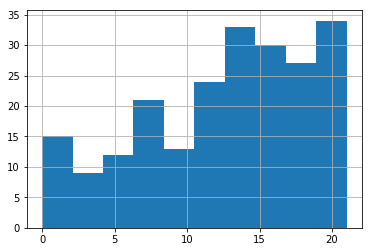

In [285]:
(dat.
 query('drug_indication=="ASTHMA"').
 loc[:,['safetyreportid',"age"]].
 drop_duplicates().
 age.
 hist()
)

In [286]:
dat.age.describe()

count    100000.000000
mean         11.863215
std           6.568330
min           0.000114
25%           6.000000
50%          13.000000
75%          17.000000
max          21.000000
Name: age, dtype: float64

## For all of the patients who had asthma what were the reported reactions?

In [287]:
# Humanized Algoirthm
# Locate "ASTHMA" in the "drug indication" variable
# Extract "drug indication", "safetyreportid","meddraconceptname" from the data
# Get rid of all the duplicates 
# Have the data grouped by the "meddraconceptname"
# Count all the number of "safetyreportid"
# Plot this data on a bar graph

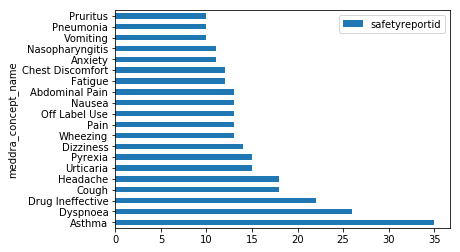

In [288]:
(dat.
 query('drug_indication=="ASTHMA"').
 loc[:,['safetyreportid',"meddra_concept_name"]].
 drop_duplicates().
 groupby("meddra_concept_name").
 count().
 sort_values("safetyreportid", ascending= False).
 head(20).
 plot.barh()
)

We observed that the reaction with the most reports was also the drug indication. We then infered that if the reaction and the drug indication are the same this could be a result of a drug that does not work. Additionally, it could be that the original drug indication was exacerbated in some way.

## Which drugs have the same indication as the reaction?

In [289]:
# Humanized Algorithm
# Extracting "drug indication", "meddra_concept_name", "safteyreportid", "atc_concept_name"
# Drop all duplicates
# Discover if indication is the same as reaction --> set as equal
# gr

In [290]:
sub = \
(dat.
loc[:,["drug_indication","safetyreportid","atc_concept_name", "meddra_concept_name"]].
drop_duplicates()
)
sub

,drug_indication,safetyreportid,atc_concept_name,meddra_concept_name
1,GONADAL DYSGENESIS,10040842,sodium fluoride,Abnormal Behaviour
3,GONADAL DYSGENESIS,10040842,sodium fluoride,Vision Blurred
5,ASTHMA,10298142,sodium fluoride,Drug Administration Error
7,ASTHMA,10298142,sodium fluoride,Insomnia
8,ASTHMA,10413313,sodium fluoride,Drug Ineffective
...,...,...,...,...
196165,CYSTIC FIBROSIS,13455410,omeprazole,Viral Upper Respiratory Tract Infection
196167,COUGH,13455410,omeprazole,Viral Upper Respiratory Tract Infection
196169,WHEEZING,13455410,omeprazole,Viral Upper Respiratory Tract Infection
196171,BACTERIAL DISEASE CARRIER,13455410,omeprazole,Viral Upper Respiratory Tract Infection


In [291]:
sub['drug_indication'].str.title()

1                Gonadal Dysgenesis
3                Gonadal Dysgenesis
5                            Asthma
7                            Asthma
8                            Asthma
                    ...            
196165              Cystic Fibrosis
196167                        Cough
196169                     Wheezing
196171    Bacterial Disease Carrier
196172                         Pain
Name: drug_indication, Length: 100000, dtype: object

In [292]:
(sub[
    (sub['meddra_concept_name'].str.title()==sub['drug_indication'].str.title())
].atc_concept_name.unique())

array(['sodium fluoride', 'stannous fluoride', 'hydrogen peroxide',
       'chlorhexidine', 'miconazole', 'triamcinolone',
       'aluminium hydroxide', 'cimetidine', 'ranitidine', 'famotidine',
       'misoprostol', 'omeprazole'], dtype=object)

## How many reports are there for drugs that have the same reactions as indications?

In [293]:
# Humanized Algorithm
# Extract "safetyreportid", "meddra_concept_name", "drug_indication", "atc_concept_name"
# Drop duplicates
# Save in the sub
# For the "meddra_concept_name" and "drug_indication" convert the names to title case
# Check equality of the two variables above
# Downgrade the resulting boolean values to integers
# Insert the above values into a new variable called equal
# groupby drugs
# Sum the equal variable

In [294]:
sub = \
(dat.
loc[:,["drug_indication","safetyreportid","atc_concept_name", "meddra_concept_name"]].
drop_duplicates()
)
sub.head()

,drug_indication,safetyreportid,atc_concept_name,meddra_concept_name
1,GONADAL DYSGENESIS,10040842,sodium fluoride,Abnormal Behaviour
3,GONADAL DYSGENESIS,10040842,sodium fluoride,Vision Blurred
5,ASTHMA,10298142,sodium fluoride,Drug Administration Error
7,ASTHMA,10298142,sodium fluoride,Insomnia
8,ASTHMA,10413313,sodium fluoride,Drug Ineffective


In [295]:
sub.loc[:,"meddra_concept_name"] = sub.loc[:,"meddra_concept_name"].str.title()

In [296]:
sub.loc[:,"drug_indication"] = sub.loc[:,"drug_indication"].str.title()

In [297]:
equal = (sub.loc[:,"meddra_concept_name"] == sub.loc[:,"drug_indication"]).astype(int)

In [298]:
sub.loc[:,"equal"] = equal

In [299]:
sub.head()

,drug_indication,safetyreportid,atc_concept_name,meddra_concept_name,equal
1,Gonadal Dysgenesis,10040842,sodium fluoride,Abnormal Behaviour,0
3,Gonadal Dysgenesis,10040842,sodium fluoride,Vision Blurred,0
5,Asthma,10298142,sodium fluoride,Drug Administration Error,0
7,Asthma,10298142,sodium fluoride,Insomnia,0
8,Asthma,10413313,sodium fluoride,Drug Ineffective,0


In [300]:
type(sub.groupby("atc_concept_name").sum())

pandas.core.frame.DataFrame

In [301]:
sub.groupby("atc_concept_name")['equal'].sum().sort_values()

atc_concept_name
nizatidine               0
aluminium hydroxide      2
hydrogen peroxide        6
miconazole               7
sodium fluoride          7
stannous fluoride        7
cimetidine              12
misoprostol             15
chlorhexidine           17
triamcinolone           22
omeprazole             218
famotidine             242
ranitidine             476
Name: equal, dtype: int64

In [302]:
data = {
    "apples" : [3,2,0,1],
    "oranges" : [0,3,7,2]
}

In [303]:
purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [304]:
purchases = pd.DataFrame(data, index= ["June", "Robert", "Lily", "David"])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [305]:
purchases.loc["June"]

apples     3
oranges    0
Name: June, dtype: int64

In [306]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, June to David
Data columns (total 2 columns):
apples     4 non-null int64
oranges    4 non-null int64
dtypes: int64(2)
memory usage: 256.0+ bytes


In [307]:
purchases.sum()

apples      6
oranges    12
dtype: int64

In [308]:
purchases.describe()

,apples,oranges
count,4.000000,4.00000
mean,1.500000,3.00000
std,1.290994,2.94392
min,0.000000,0.00000
25%,0.750000,1.50000
50%,1.500000,2.50000
75%,2.250000,4.00000
max,3.000000,7.00000


Using describe() on an entire DataFrame we can get a summary of the distribution of continuous variables

In [309]:
condition = (purchases["apples"] == "oranges")
condition.head()

June      False
Robert    False
Lily      False
David     False
Name: apples, dtype: bool

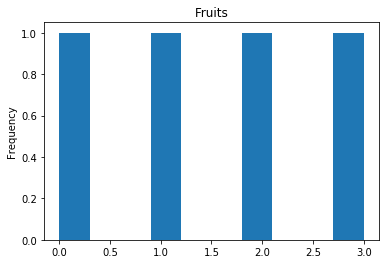

In [310]:
purchases["apples"].plot(kind="hist", title= "Fruits")

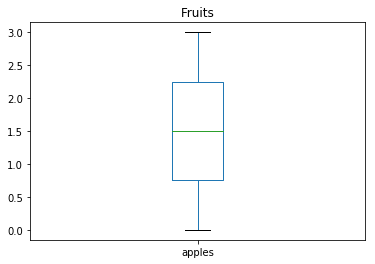

In [311]:
purchases["apples"].plot(kind="box", title= "Fruits")

In [312]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

In [313]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
    index=['A', 'Z', 'C', 'Y', 'E'])
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

In [314]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [315]:
cities['Chicago']

1000.0

In [316]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [317]:
cities[cities<1000]

Austin      450.0
Portland    900.0
dtype: float64

In [318]:
less_than_1000 = cities < 1000
print(less_than_1000)
print("\n")
print(cities[less_than_1000])

Austin            True
Boston           False
Chicago          False
New York         False
Portland          True
San Francisco    False
dtype: bool


Austin      450.0
Portland    900.0
dtype: float64


In [319]:
# Changing values based on the index
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])


Old value: 1000.0
New value: 1400.0


In [320]:
# Changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print(cities[cities < 1000])

Austin      450.0
Portland    900.0
dtype: float64


Austin      750.0
Portland    750.0
dtype: float64


In [321]:
print('Seattle' in cities)
print('San Francisco' in cities)

False
True


In [322]:
# divide city values by 3
cities / 3

Austin           250.000000
Boston                  NaN
Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
dtype: float64

In [323]:
#square city values
np.square(cities)

Austin            562500.0
Boston                 NaN
Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
dtype: float64

In [324]:
print('\n\n\n\n')

In [325]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


In [326]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [327]:
#use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool


Boston   NaN
dtype: float64


In [328]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


# What is the percentage of reports for a drug, out of all reports for the drug, having the same reactions as the indication?

In [329]:
# Humanized Algorithm
# Start from previous question's output for "How many reports are there for drugs that have the same reactions as indications?"
# srore the above as our percent numerator
# Gropby drug name and count number of reports  --> store as our percent denominator
# Divide the numerator by the denominator, multiply by 100, and sort so by the percentage value

In [330]:
sub = \
(dat.
loc[:,["drug_indication","safetyreportid","atc_concept_name", "meddra_concept_name"]].
drop_duplicates()
)
sub.head()

,drug_indication,safetyreportid,atc_concept_name,meddra_concept_name
1,GONADAL DYSGENESIS,10040842,sodium fluoride,Abnormal Behaviour
3,GONADAL DYSGENESIS,10040842,sodium fluoride,Vision Blurred
5,ASTHMA,10298142,sodium fluoride,Drug Administration Error
7,ASTHMA,10298142,sodium fluoride,Insomnia
8,ASTHMA,10413313,sodium fluoride,Drug Ineffective


In [331]:
sub.loc[:,"meddra_concept_name"] = sub.loc[:,"meddra_concept_name"].str.title()

In [332]:
sub.loc[:,"drug_indication"] = sub.loc[:,"drug_indication"].str.title()

In [333]:
equal = (sub.loc[:,"meddra_concept_name"] == sub.loc[:,"drug_indication"]).astype(int)

In [334]:
equal = (sub.loc[:,"meddra_concept_name"] == sub.loc[:,"drug_indication"]).astype(int)

In [335]:
sub.loc[:,"equal"] = equal

In [336]:
sub.head()

,drug_indication,safetyreportid,atc_concept_name,meddra_concept_name,equal
1,Gonadal Dysgenesis,10040842,sodium fluoride,Abnormal Behaviour,0
3,Gonadal Dysgenesis,10040842,sodium fluoride,Vision Blurred,0
5,Asthma,10298142,sodium fluoride,Drug Administration Error,0
7,Asthma,10298142,sodium fluoride,Insomnia,0
8,Asthma,10413313,sodium fluoride,Drug Ineffective,0


In [337]:
num = sub.groupby("atc_concept_name")['equal'].sum().sort_index()

In [338]:
denom = sub["atc_concept_name"].value_counts().sort_index()

In [339]:
((num / denom) * 100).sort_values()

atc_concept_name
nizatidine             0.000000
misoprostol            0.407056
hydrogen peroxide      0.511073
sodium fluoride        0.697211
stannous fluoride      0.735294
chlorhexidine          0.735612
cimetidine             0.743034
aluminium hydroxide    0.772201
miconazole             1.023392
famotidine             1.073885
ranitidine             1.082113
omeprazole             1.088259
triamcinolone          1.295642
dtype: float64

### What is the average age for reports for each drug and for each indication (i.e drug, indication pair)

In [340]:
# Humanized Algorithm
# Extract the "age", "atc_concept_name", "drug_indication" "safetyreportid"
# groupby (drug,indication) 
# average "age" 

In [341]:
sub = \
(dat.
    loc[:,["age", "atc_concept_name", "drug_indication", "safetyreportid"]].
 groupby(["drug_indication", "atc_concept_name"])['age'].mean()
)
sub

drug_indication          atc_concept_name
ABDOMINAL ABSCESS        famotidine           5.000000
ABDOMINAL DISCOMFORT     cimetidine          18.000000
                         famotidine          15.046512
                         misoprostol          2.000000
                         omeprazole          12.650000
                                               ...    
WOUND TREATMENT          chlorhexidine       14.000000
                         famotidine          10.000000
WRONG DRUG ADMINISTERED  omeprazole          21.000000
YEAST INFECTION          miconazole          17.000000
ZYGOMYCOSIS              famotidine           5.019048
Name: age, Length: 3559, dtype: float64

### What is the number of unique drugs reported by different reporters (i.e. report_qualification)?

In [355]:

(dat.
loc[:,["safetyreportid", "reporter_qualification", "atc_concept_name"]].
 drop_duplicates().
 groupby("reporter_qualification")["atc_concept_name"].nunique().sort_values()
)


reporter_qualification
Lawyer                                  7
Pharmacist                             11
Other health professional              12
Consumer or non-health professional    13
Physician                              13
Name: atc_concept_name, dtype: int64

### What is the percent of drugs, out of all reported drugs, reported by different reporters?

In [356]:
(dat.
loc[:,["safetyreportid", "reporter_qualification", "atc_concept_name"]].
 drop_duplicates().
 groupby("reporter_qualification")["atc_concept_name"].nunique().sort_values()
) / dat.atc_concept_name.nunique()

reporter_qualification
Lawyer                                 0.538462
Pharmacist                             0.846154
Other health professional              0.923077
Consumer or non-health professional    1.000000
Physician                              1.000000
Name: atc_concept_name, dtype: float64

### What is the average age of reports by each reporter?

In [358]:
(dat.
    loc[:,["age", "reporter_qualification", "safetyreportid"]].
    groupby("reporter_qualification")["age"].mean()
)

reporter_qualification
Consumer or non-health professional    12.605176
Lawyer                                 10.548540
Other health professional              11.861415
Pharmacist                             10.845653
Physician                              11.476089
Name: age, dtype: float64

### Of all the reports that have Asthma, what is the percent breakdown of each reporter?

In [413]:
sub = \
(dat.
    query("drug_indication == 'ASTHMA'").
    loc[:,["drug_indication", "safetyreportid", "reporter_qualification"]].
    groupby("reporter_qualification")["safetyreportid"].nunique()

)
denom = (dat.
  query("drug_indication == 'ASTHMA'")["safetyreportid"].
    nunique()
)   
sub / denom

reporter_qualification
Consumer or non-health professional    0.435780
Lawyer                                 0.004587
Other health professional              0.183486
Pharmacist                             0.045872
Physician                              0.330275
Name: safetyreportid, dtype: float64